In [1]:
import sys 
import os 
# Add the project root to sys.path
sys.path.append(os.path.abspath('../'))

from Util.Client import download_file, example_key, example_file_name

print(example_key)
print(example_file_name)

ds000228/sub-pixar001/anat/sub-pixar001_T1w.nii.gz
sub-pixar001_T1w.nii.gz


In [2]:
download_file(
    key = example_key,
    the_file_name_you_want = example_file_name
)

'Downloaded to ../Data/sub-pixar001_T1w.nii.gz'

In [3]:
import nibabel as nib

img = nib.load('..\Data\sub-pixar001_T1w.nii.gz')

print(img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (176, 192, 192)
affine:
[[   1.            0.            0.          -84.5       ]
 [   0.            0.97629595   -0.21643978  -60.18632507]
 [   0.            0.21643978    0.97629595 -131.30987549]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 176 192 192   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.   1.   1.   1.   2.53 0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0

In [4]:
img.header['sform_code']

array(1, dtype=int16)

In [5]:
img.shape

(176, 192, 192)

In [6]:
# An array of images
# each image is from the mri scan
# each image is a `slice` of the brain
mri_scan = img.get_fdata()

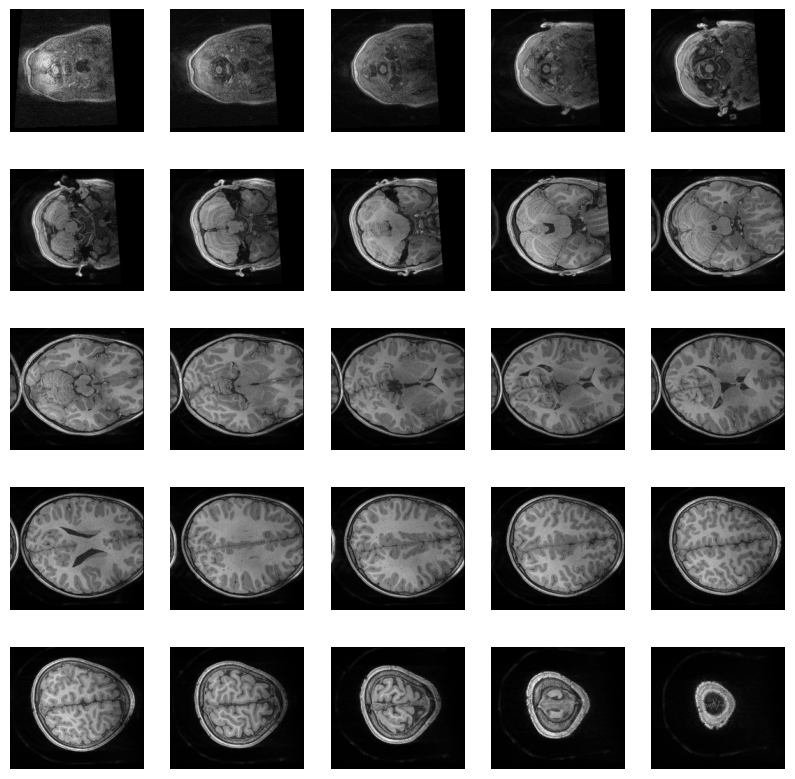

In [23]:
import matplotlib.pyplot as plt
import numpy as np 

def plot_img(img_array: np.array, n: int = 5) -> None:
    fig, axis = plt.subplots(
        nrows = n,
        ncols = n,
        figsize = (10, 10)
    )

    xMax, yMax, zMax = img_array.shape
    step = zMax // (n**2) # n^2 = total number of slices we're graphing 

    current_slice = 0 # index of current slice from the MRI scan
    # for each axis ...
    for x_center in range(n):
        for y_center in range(n):

            axis[x_center][y_center].imshow(
                mri_scan[:, :, current_slice],
                cmap = 'gray',
            )

            axis[x_center][y_center].axis('off')

            current_slice += step

plot_img(img.get_fdata())

In [24]:
# The strategy is to determine age or gender from MRIs
# According to ChatGPT: If you want to identify age-related patterns in your MRI dataset, while participants watch a Pixar movie
# Look at:
#   MRI's mid-to-high slices roughly z=20 to 50 mm in MNI space for 
#       PFC,
#       posterioir cingulate, 
#       and temporal lobes

[fetch_atlas_harvard_oxford] Dataset found in C:\Users\danie\nilearn_data\fsl


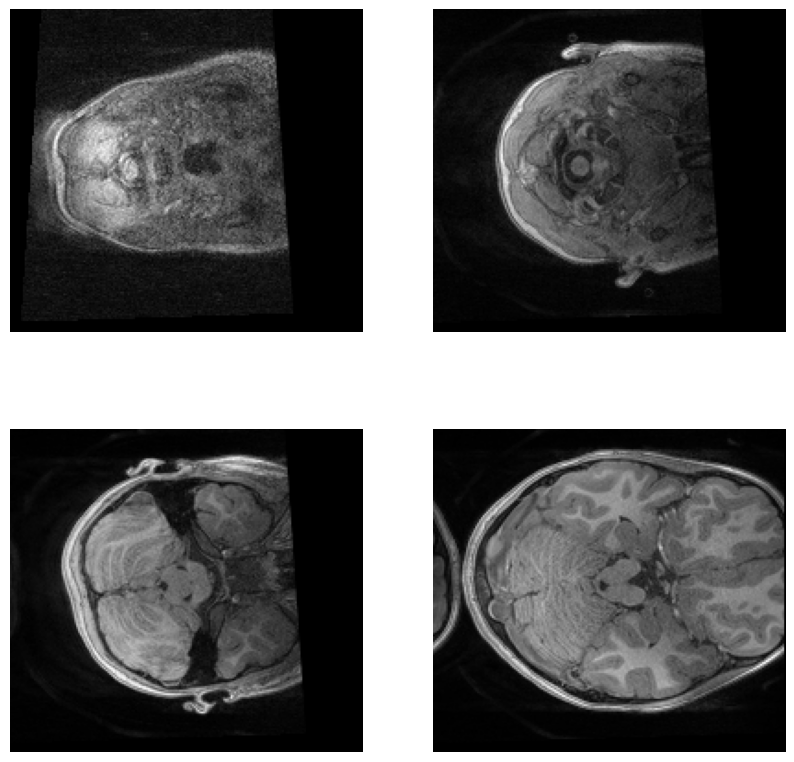

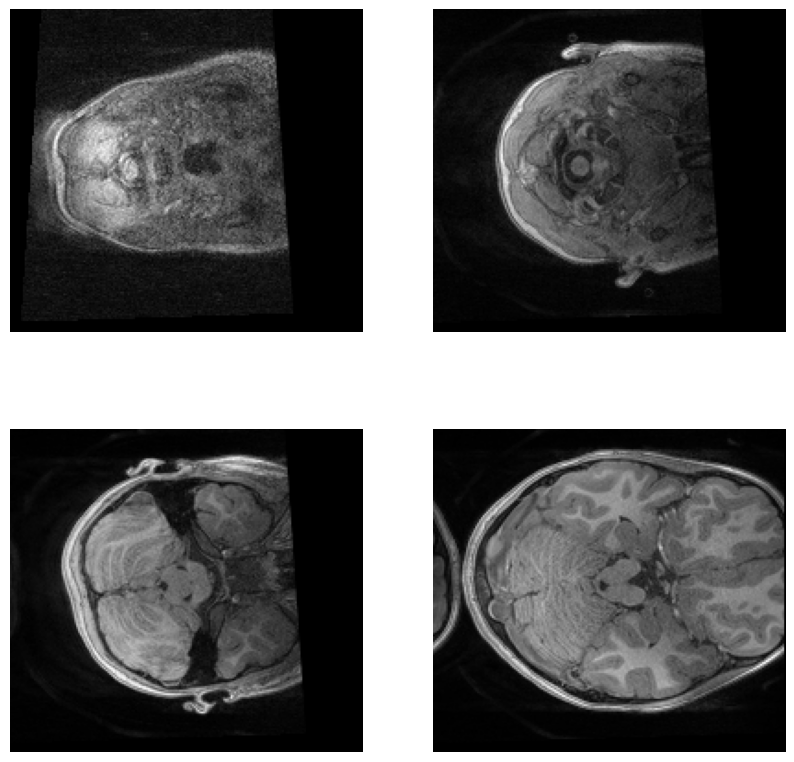

In [33]:
from nilearn import datasets, image, plotting
import nibabel as nib

# Load the probabilistic atlas
ho_atlas = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')
 
atlas_img = ho_atlas.maps
img_data = atlas_img.get_fdata()

tMax = img_data.shape[3]
for t in range(0, tMax, tMax // 2):
    plot_img(atlas_img.get_fdata()[:, :, :, t], n=2)